In [215]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_users_2.csv', 'countries.csv', 'test_users.csv', 'sessions.csv', 'sample_submission_NDF.csv', 'age_gender_bkts.csv', 'sample_submission.csv']


In [216]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [217]:
sessions = pd.read_csv('../input/sample_submission.csv')
sessions.head(10)

,id,country
0,000am9932b,NDF
1,000am9932b,US
2,000c16lc82,NDF
3,000c16lc82,US
4,000hpr0pqh,NDF
5,000hpr0pqh,US
6,000o0iw8io,NDF
7,000o0iw8io,US
8,001h113uzc,NDF
9,001h113uzc,US


**Data Initialize**

In [218]:
# Load the data into DataFrames
train_users = pd.read_csv('../input/train_users_2.csv')
test_users = pd.read_csv('../input/test_users.csv')
age_gender_bkts = pd.read_csv('../input/age_gender_bkts.csv')

In [219]:
train_users.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [220]:
age_gender_bkts.head(10)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


In [221]:
df_train = train_users.copy()
df_test = test_users.copy()

2.Data Cleaning
=============

2.1.Missing Data
-----------

In [222]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
date_first_booking,124543,0.583473
age,87990,0.412226
first_affiliate_tracked,6065,0.028414
country_destination,0,0.000000
first_browser,0,0.000000
first_device_type,0,0.000000
signup_app,0,0.000000
affiliate_provider,0,0.000000
affiliate_channel,0,0.000000
language,0,0.000000


**Age**

In [223]:
#descriptive statistics summary
df_train['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [224]:
df_train = df_train[df_train['age'] <= 100]

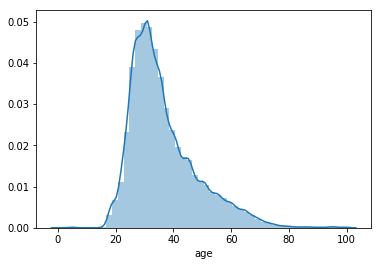

In [225]:
#histogram
sns.distplot(df_train['age'].dropna());

In [226]:
df_test.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


In [227]:
df_train = df_train.dropna(subset=['age'])
df_test['age'] = df_test['age'].fillna(36.0)

In [228]:
df_test.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,36.0,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,36.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,36.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,36.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,36.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,36.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,36.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


**first_affiliate_tracked**  

whats the first marketing the user interacted with before the signing up

In [229]:
df_train['first_affiliate_tracked'].unique()
df_test['first_affiliate_tracked'].unique()

array(['untracked', 'linked', 'omg', 'product', 'marketing',
       'tracked-other', nan, 'local ops'], dtype=object)

In [230]:
df_train['first_affiliate_tracked'].value_counts()
df_test['first_affiliate_tracked'].value_counts()

untracked        33949
linked           15777
omg              10877
product            797
tracked-other      499
marketing          142
local ops           35
Name: first_affiliate_tracked, dtype: int64

In [231]:
df_train['first_affiliate_tracked'] = df_train['first_affiliate_tracked'].fillna('untracked')
df_test['first_affiliate_tracked'] = df_test['first_affiliate_tracked'].fillna('untracked')

In [232]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
date_first_booking,55905,0.454084
country_destination,0,0.000000
first_browser,0,0.000000
first_device_type,0,0.000000
signup_app,0,0.000000
first_affiliate_tracked,0,0.000000
affiliate_provider,0,0.000000
affiliate_channel,0,0.000000
language,0,0.000000
signup_flow,0,0.000000


**date_first_booking**

date of first booking

In [233]:
df_train = df_train.drop(['date_first_booking','id'], 1)
df_test = df_test.drop(['date_first_booking','id'], 1)

2.2.Label Encoding
--------

**country_destination**

In [234]:


# label_encoder.fit(df_train['country_destination'])
# print(label_encoder.classes_)

# df_train['country_destination'] = label_encoder.transform(df_train['country_destination'])
# print(df_train.head(10))

**Gender**

In [235]:
df_train['gender'].value_counts()

FEMALE       56765
MALE         49987
-unknown-    16139
OTHER          225
Name: gender, dtype: int64

In [236]:
# df_train = df_train.drop(df_train[(df_train['gender'] == '-unknown-')|(df_train['gender'] == 'OTHER')].index)
# df_train['gender'].value_counts()

# df_test = df_test.drop(df_test[(df_test['gender'] == '-unknown-')|(df_test['gender'] == 'OTHER')].index)
# df_test['gender'].value_counts()

In [237]:
# #Label Encoding
label_encoder = preprocessing.LabelEncoder() 

label_encoder.fit(df_train['gender'])
print(label_encoder.classes_)

df_train['gender'] = label_encoder.transform(df_train['gender']) 
df_train.head(10)

df_test['gender'] = label_encoder.transform(df_test['gender']) 

['-unknown-' 'FEMALE' 'MALE' 'OTHER']


**signup_method**

Test's data doesn't have a data class.

In [238]:
label_encoder.fit(df_train['signup_method'])
print(label_encoder.classes_)

df_train['signup_method'] = label_encoder.transform(df_train['signup_method']) 
df_train.head(10)

df_test.loc[df_test.signup_method == 'weibo', 'signup_method'] = 'google'
df_test['signup_method'] = label_encoder.transform(df_test['signup_method']) 

['basic' 'facebook' 'google']


**language**

In [239]:
label_encoder.fit(df_train['language'])
print(label_encoder.classes_)

df_train['language'] = label_encoder.transform(df_train['language']) 
df_train.head(10)

df_test.loc[df_test.language == '-unknown-', 'language'] = 'en'
df_test['language'] = label_encoder.transform(df_test['language']) 



['ca' 'cs' 'da' 'de' 'el' 'en' 'es' 'fi' 'fr' 'hr' 'hu' 'id' 'is' 'it'
 'ja' 'ko' 'nl' 'no' 'pl' 'pt' 'ru' 'sv' 'th' 'tr' 'zh']


**affiliate_channel**

In [240]:
label_encoder.fit(df_train['affiliate_channel'])
print(label_encoder.classes_)

df_train['affiliate_channel'] = label_encoder.transform(df_train['affiliate_channel']) 
df_train.head(10)

df_test['affiliate_channel'] = label_encoder.transform(df_test['affiliate_channel']) 

['api' 'content' 'direct' 'other' 'remarketing' 'sem-brand'
 'sem-non-brand' 'seo']


**affiliate_provider**

In [241]:
label_encoder.fit(df_train['affiliate_provider'])
print(label_encoder.classes_)

df_train['affiliate_provider'] = label_encoder.transform(df_train['affiliate_provider']) 
df_train.head(10)

df_test.loc[df_test.affiliate_provider == 'daum', 'affiliate_provider'] = 'other'
df_test['affiliate_provider'] = label_encoder.transform(df_test['affiliate_provider'])

['baidu' 'bing' 'craigslist' 'direct' 'email-marketing' 'facebook'
 'facebook-open-graph' 'google' 'gsp' 'meetup' 'naver' 'other' 'padmapper'
 'vast' 'wayn' 'yahoo' 'yandex']


**first_affiliate_tracked**

In [242]:
label_encoder.fit(df_train['first_affiliate_tracked'])
print(label_encoder.classes_)

df_train['first_affiliate_tracked'] = label_encoder.transform(df_train['first_affiliate_tracked']) 
df_train.head(10)

df_test['first_affiliate_tracked'] = label_encoder.transform(df_test['first_affiliate_tracked']) 

['linked' 'local ops' 'marketing' 'omg' 'product' 'tracked-other'
 'untracked']


**signup_app**

In [243]:
label_encoder.fit(df_train['signup_app'])
print(label_encoder.classes_)

df_train['signup_app'] = label_encoder.transform(df_train['signup_app']) 
df_train.head(10)

df_test['signup_app'] = label_encoder.transform(df_test['signup_app']) 

['Android' 'Moweb' 'Web' 'iOS']


**first_device_type**

In [244]:
label_encoder.fit(df_train['first_device_type'])
print(label_encoder.classes_)

df_train['first_device_type'] = label_encoder.transform(df_train['first_device_type']) 
df_train.head(10)

df_test['first_device_type'] = label_encoder.transform(df_test['first_device_type']) 

['Android Phone' 'Android Tablet' 'Desktop (Other)' 'Mac Desktop'
 'Other/Unknown' 'SmartPhone (Other)' 'Windows Desktop' 'iPad' 'iPhone']


**first_browser**

In [245]:
label_encoder.fit(df_train['first_browser'])
print(label_encoder.classes_)

df_train['first_browser'] = label_encoder.transform(df_train['first_browser']) 
df_train.head(10)

df_test.loc[df_test.first_browser == 'wOSBrowser', 'first_browser'] = '-unknown-'
df_test.loc[df_test.first_browser == 'Mobile Safari', 'first_browser'] = '-unknown-'
df_test.loc[df_test.first_browser == 'UC Browser', 'first_browser'] = '-unknown-'
df_test.loc[df_test.first_browser == 'IBrowse', 'first_browser'] = '-unknown-'
df_test.loc[df_test.first_browser == 'Nintendo Browser', 'first_browser'] = '-unknown-'


df_test['first_browser'] = label_encoder.transform(df_test['first_browser']) 

['-unknown-' 'AOL Explorer' 'Android Browser' 'Apple Mail' 'Avant Browser'
 'BlackBerry Browser' 'Camino' 'Chrome' 'Chrome Mobile' 'Chromium'
 'CometBird' 'Comodo Dragon' 'CoolNovo' 'Firefox' 'IE' 'IE Mobile'
 'IceWeasel' 'Iron' 'Kindle Browser' 'Maxthon' 'Mobile Firefox'
 'Mobile Safari' 'Mozilla' 'NetNewsWire' 'Opera' 'Opera Mini'
 'Opera Mobile' 'PS Vita browser' 'Pale Moon' 'RockMelt' 'Safari'
 'SeaMonkey' 'Silk' 'SiteKiosk' 'SlimBrowser' 'Sogou Explorer' 'Stainless'
 'TenFourFox' 'TheWorld Browser' 'Yandex.Browser' 'wOSBrowser']


In [246]:
df_train['date_account_created_year'] = pd.DatetimeIndex(df_train['date_account_created']).year
df_train['date_account_created_month'] = pd.DatetimeIndex(df_train['date_account_created']).month

df_test['date_account_created_year'] = pd.DatetimeIndex(df_test['date_account_created']).year
df_test['date_account_created_month'] = pd.DatetimeIndex(df_test['date_account_created']).month

In [247]:
df_train = df_train.drop(['date_account_created','timestamp_first_active'], 1)
df_train.head(10)

df_test = df_test.drop(['date_account_created','timestamp_first_active'], 1)

In [248]:
print(df_train.dtypes)

gender                          int64
age                           float64
signup_method                   int64
signup_flow                     int64
language                        int64
affiliate_channel               int64
affiliate_provider              int64
first_affiliate_tracked         int64
signup_app                      int64
first_device_type               int64
first_browser                   int64
country_destination            object
date_account_created_year       int64
date_account_created_month      int64
dtype: object


In [249]:
for col in ['gender',
'signup_method',
'signup_flow',
'language',
'affiliate_channel',
'affiliate_provider',
'first_affiliate_tracked',
'signup_app',
'first_device_type',
'first_browser',
'country_destination',
'date_account_created_year',
'date_account_created_month']:
    df_train[col] = df_train[col].astype('str')
print(df_train.dtypes)

gender                         object
age                           float64
signup_method                  object
signup_flow                    object
language                       object
affiliate_channel              object
affiliate_provider             object
first_affiliate_tracked        object
signup_app                     object
first_device_type              object
first_browser                  object
country_destination            object
date_account_created_year      object
date_account_created_month     object
dtype: object


In [250]:
feature = ['gender',
 'age',
'signup_method',
'signup_flow',
'language',
'affiliate_channel',
'affiliate_provider',
'first_affiliate_tracked',
'signup_app',
'first_device_type',
'first_browser',
'date_account_created_year',
'date_account_created_month']
target = 'country_destination'

In [251]:
df = df_train.copy()

df_t = df_test.copy()

In [252]:
df_test.head(10)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_account_created_year,date_account_created_month
0,1,35.0,1,0,5,2,3,6,1,8,0,2014,7
1,0,36.0,0,0,5,2,3,6,1,8,0,2014,7
2,0,36.0,0,0,5,2,3,0,2,6,7,2014,7
3,0,36.0,0,0,5,2,3,0,2,6,14,2014,7
4,0,36.0,0,0,5,2,3,6,2,3,30,2014,7
5,1,28.0,0,0,5,5,7,3,2,6,7,2014,7
6,2,48.0,0,25,5,2,3,6,3,8,0,2014,7
7,0,36.0,0,0,5,2,3,6,2,3,7,2014,7
8,0,36.0,0,0,5,2,3,6,2,3,7,2014,7
9,0,36.0,0,0,5,6,7,3,2,6,13,2014,7


In [253]:
df_t.head(10)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_account_created_year,date_account_created_month
0,1,35.0,1,0,5,2,3,6,1,8,0,2014,7
1,0,36.0,0,0,5,2,3,6,1,8,0,2014,7
2,0,36.0,0,0,5,2,3,0,2,6,7,2014,7
3,0,36.0,0,0,5,2,3,0,2,6,14,2014,7
4,0,36.0,0,0,5,2,3,6,2,3,30,2014,7
5,1,28.0,0,0,5,5,7,3,2,6,7,2014,7
6,2,48.0,0,25,5,2,3,6,3,8,0,2014,7
7,0,36.0,0,0,5,2,3,6,2,3,7,2014,7
8,0,36.0,0,0,5,2,3,6,2,3,7,2014,7
9,0,36.0,0,0,5,6,7,3,2,6,13,2014,7


In [254]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

In [255]:
df_train_target = df_train['country_destination']
df_train = df_train.drop(['country_destination'],1)
df_test_target = df_test['country_destination']
df_test = df_test.drop(['country_destination'],1)

In [256]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(df_train, df_train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [257]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(df_test)
accuracy = accuracy_score(df_test_target, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.467
Mean accuracy score: 0.473


**Test**

In [258]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(df_train, df_train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [259]:
df_t.head(100)

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_account_created_year,date_account_created_month
0,1,35.0,1,0,5,2,3,6,1,8,0,2014,7
1,0,36.0,0,0,5,2,3,6,1,8,0,2014,7
2,0,36.0,0,0,5,2,3,0,2,6,7,2014,7
3,0,36.0,0,0,5,2,3,0,2,6,14,2014,7
4,0,36.0,0,0,5,2,3,6,2,3,30,2014,7
5,1,28.0,0,0,5,5,7,3,2,6,7,2014,7
6,2,48.0,0,25,5,2,3,6,3,8,0,2014,7
7,0,36.0,0,0,5,2,3,6,2,3,7,2014,7
8,0,36.0,0,0,5,2,3,6,2,3,7,2014,7
9,0,36.0,0,0,5,6,7,3,2,6,13,2014,7


In [260]:
print(df_t.shape)

(62096, 13)


In [264]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(df_t)
test = pd.DataFrame(columns=['id', 'country'])
test['id'] = test_users['id']
test['country'] = predicted

test.to_csv('submission.csv',index=False)